## Titanic Data Exploration ##

***

Over the past several weeks, you've learned the code about how to explore and manipulate a dataset. Now it's time to practice what you've learned on a real-world dataset. 

***

### Titanic Dataset

The titanic dataset holds information about the passengers on the titanic. This includes passenger name, characteristics, and if they survived the accident. The dataset has the following columns:

    * pclass = passenger class; 1 = first class, 2 = second class, 3 = third class
    * survived = passenger survival; 1 = survived, 0 = did not survive
    * name = passenger name
    * sex = sex of passenger
    * age = age of passenger
    * sibsp = # of siblings / spouses aboard the Titanic
    * parch = # of parents / children aboard the Titanic
    * ticket = ticket number
    * fare = fare paid by passenger
    * cabin = passenger cabin
    * embarked = port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton
    * boat = lifeboat assignment 
    * body = recovered body number
    * home dest = anticipated home destination 
    
If you need some additional motivation before starting, please visit: https://www.youtube.com/watch?v=3gK_2XdjOdY

### How to work through the dataset:

Follow the prompts below to explore, manipulate, and visualize aspects of the dataset. Working with data takes time, so take your time as you start with a messy dataset and turn it into something that shows meaningful visualizations. 

***


### Import Libraries and Dataset

* Review the entire notebook to determine what you will be expected to do - then, import the necessary libraries
* Import the titanic.xlsx dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tt = pd.read_excel("titanic.xlsx")

### Determine the Characteristics of the Dataset

   * How many columns are in this dataset?
   * How many rows are in this dataset?
   * What types of data are in each column? Does this make sense with that you know about that column?
   * Which variables are numeric? Which variables are categorical? What other variables are left outside of these two groups?
   * Which variable could be considered a 'dependent' variable?

In [3]:
tt.shape # there are 1309 rows and 14 columns

(1309, 14)

In [4]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


Numerical variables are: 'pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body'
Categorical variables (or qualitative data) are: 'name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest'

'pclass' could be considered a DV

### Identify the Missing Data in the Dataset

   * Is there any missing data?
   * Which columns have any missing data?
   * Which column has the most missing information? Which column has the least?

In [5]:
tt.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

'body' has the most missing information, and 'fare' the least

### Handling the Missing Data in the Dataset

   * Remove the columns with excessive missing data (any column missing greater than 500 rows)
   * When there is very little missing data, we can make replacements. Replace the missing data for the "embarked" column with the most common embarkation point. 
   * Replace the missing data in "fare" with the average fare of the entire sample. 
   * Remove the rows in the dataset that has missing "age" data. 
   * Recheck is there is any data missing in the dataset. 

In [6]:
tt.drop(columns = ['cabin', 'boat', 'body', 'home.dest'], inplace = True)

In [7]:
tt["embarked"].mode()

0    S
dtype: object

In [8]:
#Replace the missing data for the "embarked" column with the most common embarkation point.

tt["embarked"].replace(np.nan, 'S', inplace = True)

In [9]:
tt["fare"].mean()

33.29547928134572

In [10]:
#Replace the missing data in "fare" with the average fare of the entire sample.

tt['fare'].replace(np.nan, 33.3 , inplace = True)

In [11]:
#Remove the rows in the dataset that has missing "age" data. 

tt.dropna(subset = ['age'], inplace = True)

In [12]:
#Recheck is there is any data missing in the dataset. 
tt.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [13]:
ttc = tt.copy()

# Checking copy

ttc.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


### Creating Columns and Replacing Labels

   * Create descriptive labels for the categorical columns: pclass, survived, and embarked. Instead of the coding that shows in the dataset, create labels to describe what each category represents (i.e. in the embarked column S = Southhampton)
   * Create a new column called "Titanic Passenger" and make all values 1
   * Create a new column called "Family Size" - this column should equal the total number of family members each passenger was traveling with.
   * Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family. 
   * Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is less than 13-years old AND the passenger is traveling with at least one family member, otherwise the value should be 0. 
   * Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise. 
   * Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create. 
   
After create new columns, replace the basic coding "0/1" with meaningful labels. 

In [14]:
#create labels to describe what each category represents

ttc['embarked'].replace(['S', 'C', 'Q'], ['Southhampton', 'Cherbourg','Queenstown'], inplace = True)

ttc['pclass'].replace([1, 2, 3], ['first class', 'second class', 'third class'], inplace = True)

ttc['survived'].replace([1,0], ['survived', 'did not survived'], inplace = True)

#checking
ttc.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,first class,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southhampton
1,first class,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southhampton
2,first class,did not survived,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southhampton
3,first class,did not survived,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southhampton
4,first class,did not survived,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southhampton


In [15]:
#Create a new column called "Titanic Passenger" and make all values 1

ttc['titanic passenger'] = 1
ttc['titanic passenger'].replace(1, 'yes', inplace = True)

In [16]:
#Create a new column called "Family Size" 
#- this column should equal the total number of family members each passenger was traveling with.

ttc['family size'] = ttc['sibsp'] + ttc['parch']

In [17]:
ttc['family size'].value_counts()

0     590
1     206
2     144
3      39
5      25
4      17
6      16
7       8
10      1
Name: family size, dtype: int64

In [18]:
#Create a column called "Travel Alone" 
#- this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family.

ttc['travel alone'] = np.where((ttc['family size'] == 0), 1, 0)

In [19]:
#Create a column called "Has Caregiver" 
#- this column should have a value of 1 if a passenger is less than 13-years old 
#AND the passenger is traveling with at least one family member, otherwise the value should be 0. 

conditions = [((ttc['age'] < 13) & (ttc['travel alone'] == 0))]
outcome = [1]
ttc['has caregiver'] = np.select(conditions, outcome, default = 0)
ttc['has caregiver'].replace([1, 0], ['yes', 'no'], inplace = True)

In [20]:
#Create a column called "Crew" 
#- this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise.

ttc['crew'] = np.where((ttc['fare'] == 0), 1, 0)

In [21]:
#Create a column called "Age Group" to group passengers by their age 
#(create five categories: infant, child, teen, adult, senior). 
#You can use bins to complete this (or any other method you like). 
#You define the cutoff points for each group you create. 
# infant = 0-2
# child = 3-9
# teen = 10-19
# adult = 20-60
# senior = 61- 80+
bins = [0, 2, 9, 19, 60 ,150]
bins_labels = ['Infant', 'Child', 'Teen', 'Adult', 'Senior']
ttc['age group'] = pd.cut(ttc['age'], bins, labels = bins_labels)

In [22]:
#After create new columns, replace the basic coding "0/1" with meaningful labels. 

ttc['travel alone'].replace([1, 0], ['yes', 'no'], inplace = True)
ttc['crew'].replace([0, 1], ['free ticket', 'paid ticket'], inplace = True)

In [23]:
ttc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   pclass             1046 non-null   object  
 1   survived           1046 non-null   object  
 2   name               1046 non-null   object  
 3   sex                1046 non-null   object  
 4   age                1046 non-null   float64 
 5   sibsp              1046 non-null   int64   
 6   parch              1046 non-null   int64   
 7   ticket             1046 non-null   object  
 8   fare               1046 non-null   float64 
 9   embarked           1046 non-null   object  
 10  titanic passenger  1046 non-null   object  
 11  family size        1046 non-null   int64   
 12  travel alone       1046 non-null   object  
 13  has caregiver      1046 non-null   object  
 14  crew               1046 non-null   object  
 15  age group          1046 non-null   category
dtypes: cat

In [24]:
#checking
ttc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   pclass             1046 non-null   object  
 1   survived           1046 non-null   object  
 2   name               1046 non-null   object  
 3   sex                1046 non-null   object  
 4   age                1046 non-null   float64 
 5   sibsp              1046 non-null   int64   
 6   parch              1046 non-null   int64   
 7   ticket             1046 non-null   object  
 8   fare               1046 non-null   float64 
 9   embarked           1046 non-null   object  
 10  titanic passenger  1046 non-null   object  
 11  family size        1046 non-null   int64   
 12  travel alone       1046 non-null   object  
 13  has caregiver      1046 non-null   object  
 14  crew               1046 non-null   object  
 15  age group          1046 non-null   category
dtypes: cat

In [25]:
ttc.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,titanic passenger,family size,travel alone,has caregiver,crew,age group
0,first class,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southhampton,yes,0,yes,no,free ticket,Adult
1,first class,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southhampton,yes,3,no,yes,free ticket,Infant
2,first class,did not survived,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southhampton,yes,3,no,yes,free ticket,Infant
3,first class,did not survived,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southhampton,yes,3,no,no,free ticket,Adult
4,first class,did not survived,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southhampton,yes,3,no,no,free ticket,Adult


### Determine Frequencies of Groups

* How many passengers fall into each category? Determine how many passengers fall into each group for <b>each</b> categorical vairable (including the ones you just created). 

In [26]:
ttc[['pclass']].value_counts()       

pclass      
third class     501
first class     284
second class    261
dtype: int64

In [27]:
ttc['survived'].value_counts()           

did not survived    619
survived            427
Name: survived, dtype: int64

In [28]:
ttc['sex'].value_counts()                  

male      658
female    388
Name: sex, dtype: int64

In [29]:
ttc['embarked'].value_counts()             

Southhampton    784
Cherbourg       212
Queenstown       50
Name: embarked, dtype: int64

In [30]:
ttc['travel alone'].value_counts()         

yes    590
no     456
Name: travel alone, dtype: int64

In [31]:
ttc[['has caregiver']] .value_counts()

has caregiver
no               955
yes               91
dtype: int64

In [32]:
ttc[['crew']].value_counts()

crew       
free ticket    1038
paid ticket       8
dtype: int64

In [33]:
ttc[['age group']].value_counts()

age group
Adult        788
Teen         143
Child         48
Infant        34
Senior        33
dtype: int64

### Determine the Distribution of Numeric Data

* What are the summary statistics for <b>each</b> numeric variable in the dataset? Summary statistics include:
    * Mean
    * Median
    * Mode
    * Standard Deviation
    * Range

In [34]:
ttc.describe()

,age,sibsp,parch,fare,family size
count,1046.000000,1046.000000,1046.00000,1046.000000,1046.000000
mean,29.881135,0.502868,0.42065,36.682843,0.923518
std,14.413500,0.912167,0.83975,55.705959,1.452891
min,0.166700,0.000000,0.00000,0.000000,0.000000
25%,21.000000,0.000000,0.00000,8.050000,0.000000
50%,28.000000,0.000000,0.00000,15.800000,0.000000
75%,39.000000,1.000000,1.00000,35.500000,1.000000
max,80.000000,8.000000,6.00000,512.329200,10.000000


In [35]:
ttc.mode()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,titanic passenger,family size,travel alone,has caregiver,crew,age group
0,third class,did not survived,"Connolly, Miss. Kate",male,24.0,0.0,0.0,CA 2144,13.0,Southhampton,yes,0.0,yes,no,free ticket,Adult
1,NaN,NaN,"Kelly, Mr. James",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Range
age_range = ttc['age'].max() - ttc['age'].min()
sibsp_range = ttc['sibsp'].max() - ttc['sibsp'].min()
parch_range = ttc['parch'].max() - ttc['parch'].min()
fare_range = ttc['fare'].max() - ttc['fare'].min()
family_size_range = ttc['family size'].max() - ttc['family size'].min()

print(age_range)
print(sibsp_range)
print(parch_range)
print(fare_range)
print(family_size_range)

79.8333
8
6
512.3292
10


### Relationships between Variables

* Determine the relationship between each variable and the variable "survived". This is our primary variable of interest -- did this passenger survive the accident? Did the characteristics of the passenger have any relationship with their survival?
    * <b>pclass</b>: how many survivors are in each passenger class? does a pattern emerge? which class has the most survivors? which has the least?
    * <b>sex</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>age</b>: how does the average age of the passenger differ based on survival group? 
    * <b>age group</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>family size</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>travel alone</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>crew</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>has caregiver</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>fare</b>: how does the average fare the passenger paid differ based on survival group? 
    * <b>embarked</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    
Based on what you learn working through this section, make (2) statements about what characteristics of passenger most influenced their survival.

In [37]:
pd.crosstab(ttc['survived'], ttc['pclass'], margins = True)

#first class passengers survived the most and had less loss, contrary to the third class passengers

pclass,first class,second class,third class,All
survived,,,,
did not survived,103,146,370,619
survived,181,115,131,427
All,284,261,501,1046


In [38]:
pd.crosstab(ttc['survived'], ttc['sex'], margins = True)

#most of non survivors are male, while most survivors are female

sex,female,male,All
survived,,,
did not survived,96,523,619
survived,292,135,427
All,388,658,1046


In [39]:
ttc[['age']].groupby(ttc['survived']).mean()

#the avg survivor is around 29 years old and the perrished passenger is around 30 to 31 years old

,age
survived,
did not survived,30.545369
survived,28.918228


In [40]:
pd.crosstab(ttc['survived'], ttc['age group'], margins = True)

#most survivors are adults with the very least seniors
#most perished passengers were adult and the least are infants.

age group,Infant,Child,Teen,Adult,Senior,All
survived,,,,,,
did not survived,13,19,87,475,25,619
survived,21,29,56,313,8,427
All,34,48,143,788,33,1046


In [41]:
pd.crosstab(ttc['survived'], ttc['family size'], margins = True)

#passengers whom perrished and survived the most are the ones that had no family on board

family size,0,1,2,3,4,5,6,7,10,All
survived,,,,,,,,,,
did not survived,402,93,63,9,11,20,12,8,1,619
survived,188,113,81,30,6,5,4,0,0,427
All,590,206,144,39,17,25,16,8,1,1046


In [42]:
pd.crosstab(ttc['survived'], ttc['travel alone'], margins = True)

#The passengers traveling with family member did not survived the least, and the ones traveling alone survived the least

travel alone,no,yes,All
survived,,,
did not survived,217,402,619
survived,239,188,427
All,456,590,1046


In [43]:
pd.crosstab(ttc['survived'], ttc['crew'], margins = True)
#Passengers who didn't paid for their ticket did not survived the most, and those who paid theirs survived the least

crew,free ticket,paid ticket,All
survived,,,
did not survived,613,6,619
survived,425,2,427
All,1038,8,1046


In [44]:
pd.crosstab(ttc['survived'], ttc['has caregiver'], margins = True)

#most survivors had no caregiver, and the ones who did not survived the least had caregiver

has caregiver,no,yes,All
survived,,,
did not survived,580,39,619
survived,375,52,427
All,955,91,1046


In [45]:
ttc['fare'].groupby(ttc['survived']).mean()

#Out of the passengers that paid for their ticket, the ones who survived paid on avg more than their counterparts

survived
did not survived    25.161920
survived            53.384134
Name: fare, dtype: float64

In [46]:
pd.crosstab(ttc['survived'], ttc['embarked'], margins = True)

#

embarked,Cherbourg,Queenstown,Southhampton,All
survived,,,,
did not survived,80,37,502,619
survived,132,13,282,427
All,212,50,784,1046


In [47]:
ttc.corr()

,age,sibsp,parch,fare,family size
age,1.000000,-0.243699,-0.150917,0.178229,-0.240230
sibsp,-0.243699,1.000000,0.374456,0.141195,0.844260
parch,-0.150917,0.374456,1.000000,0.216726,0.813080
fare,0.178229,0.141195,0.216726,1.000000,0.213911
family size,-0.240230,0.844260,0.813080,0.213911,1.000000


### Visualize your Results

* Using the most interesting (from your POV) results from the above section, create (3) visualizations to illustrate the results. 
* Create a barplot to show the variation in average age across passenger class. On average, which passenger class has the oldest passengers?
* Create a violin plot to show the distribution of age across passenger class. 

In [48]:
ttc.shape

(1046, 16)

### Visualization 1

Text(0.5, 1.0, 'Family size Statistic by survived and gender')

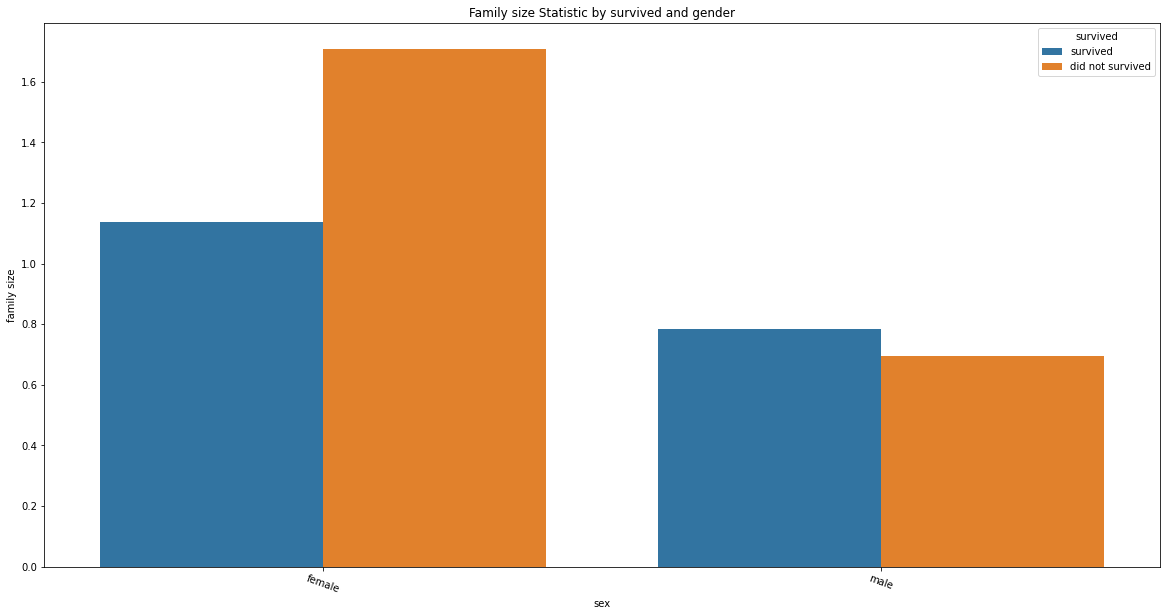

In [49]:
#Survival by gender 

plt.figure(figsize=(20,10))

sns.barplot(data = ttc, x = "sex", y = "family size", hue = "survived", ci = None)

plt.xticks(rotation = -20)
plt.title('Family size Statistic by survived and gender')
#plt.legend()

### Visualization 2

Text(0.5, 1.0, 'Survival statistics by passenger class')

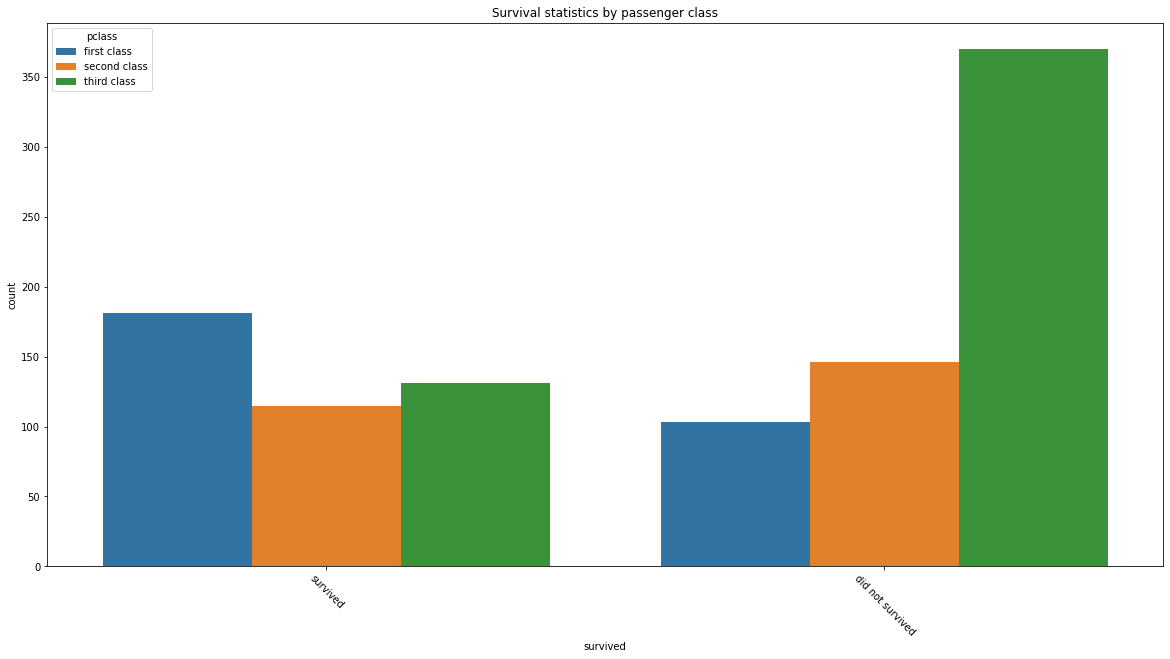

In [50]:
#survival by passenger class

plt.figure(figsize=(20,10))

sns.countplot(data = ttc, x = "survived", hue = "pclass")

plt.xticks(rotation = -45)
plt.title('Survival statistics by passenger class')

### Visualization 3

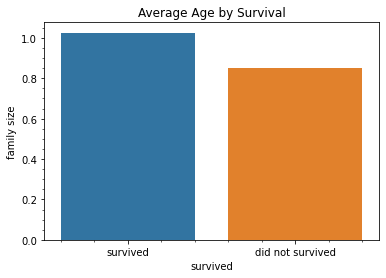

In [53]:
## survival by family size

sns.barplot(data = ttc, x = "survived", y = 'family size', ci = None)

plt.title('Average Age by Survival')
plt.minorticks_on() 

Text(0.5, 1.0, 'Passenger Class Statistic by age')

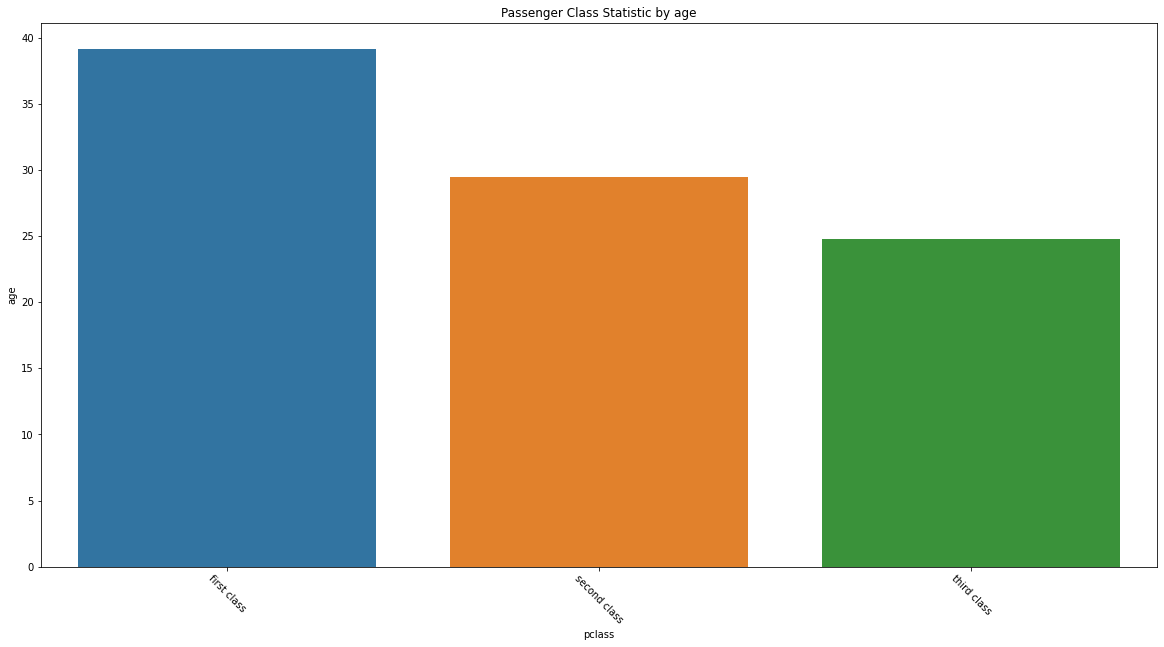

In [54]:
#Create a barplot to show the variation in average age across passenger class. 
#On average, which passenger class has the oldest passengers?
plt.figure(figsize=(20,10))

sns.barplot(data = ttc, x = "pclass", y = "age", ci = None)

plt.xticks(rotation = -45)
plt.title('Passenger Class Statistic by age')

#The first class has the oldest passengers

<AxesSubplot:xlabel='pclass', ylabel='age'>

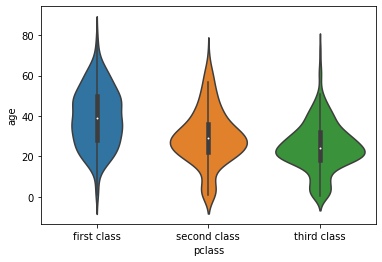

In [55]:
#Create a violin plot to show the distribution of age across passenger class. 

sns.violinplot(x = ttc["pclass"], y = ttc["age"])